In [464]:
#import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import decimal
#set style for sns graph
sns.set_style('darkgrid')

pd.options.mode.chained_assignment = None  # hide the warn

In [465]:
#Somehow, there may be an error happened when running codes in some computer.
#You can delete the ":-20" or ":-10" in below codes：table#.iloc. Then, try again.
#read the first table and select the table with variables
table1 = pd.read_excel("UN_MigrantStockTotal_2015.xlsx", sheet_name=1, header=14)
table1 = table1.iloc[1:,:-20]
#read the second table and select the table with variables
table2 = pd.read_excel("UN_MigrantStockTotal_2015.xlsx", sheet_name=2, header=14)
table2 = table2.iloc[1:]
#read the third table and select the table with variables
table3 = pd.read_excel("UN_MigrantStockTotal_2015.xlsx", sheet_name=3, header=14)
table3 = table3.iloc[1:]
#read the 4th table and select the table with variables
table4 = pd.read_excel("UN_MigrantStockTotal_2015.xlsx", sheet_name=4, header=14)
table4 = table4.iloc[1:]
#read the 5th table and select the table with variables
table5 = pd.read_excel("UN_MigrantStockTotal_2015.xlsx", sheet_name=5, header=14)
table5 = table5.iloc[1:,:-10]
#read the 6th table and select the table with variables
table6 = pd.read_excel("UN_MigrantStockTotal_2015.xlsx", sheet_name=6, header=14)
table6 = table6.iloc[1:,:-10]


In [466]:
#Table 1
#reset columns names, drop "Notes" columns and add two empty columns
table1.columns = ["Sort Order", "Country or area", "Notes","Country code", "Type of data", "b1990", "b1995", "b2000", "b2005", "b2010", "b2015", "m1990", "m1995", "m2000", "m2005", "m2010", "m2015","f1990", "f1995", "f2000", "f2005", "f2010", "f2015"]
table1 = table1.drop(columns=["Notes"])
table1.insert(2, "Major area", "")
table1.insert(3, "Region", "")

#read the annex table
annex = pd.read_excel("UN_MigrantStockTotal_2015.xlsx", sheet_name=7, header=14)

#according to the annex table and the name of country or area, fill the proper variables for "Major area" and "Region" columns
index_table1 = 1
for x in table1["Country or area"]:
    index_annex = 0
    for y in annex["Country or area"]:
        if x == y:
            table1["Major area"][index_table1] = annex["Major area"][index_annex]
            table1["Region"][index_table1] = annex["Region"][index_annex]  
        index_annex+=1
    index_table1+=1

#change the format of dataframe
table1 = table1.replace("\..", np.nan, regex = True)
table1 = table1.melt(id_vars=["Sort Order", "Country or area", "Major area", "Region", "Country code", "Type of data"], var_name=["gy"], value_name="International migrant stock at mid-year")
table1 = (table1.assign(Gender = lambda x: x.gy.str[0].astype(str), Time = lambda x: x.gy.str[1:].astype(str)).drop("gy",axis=1))
table1 = table1.replace(to_replace =["b","m","f"],value =["Both", "Male", "Female"])
#table1 = table1.drop(table1[table1.Gender == "Both"].index)

#styling the dataset
table1 = table1.drop(table1[table1.Region == ""].index)
table1 = table1[["Sort Order", "Country or area", "Major area", "Region", "Country code", "Type of data", "Gender", "Time", "International migrant stock at mid-year"]]
table1 = table1.reset_index()
table1 = table1.drop(columns="index")
table1.tail(20)


,Sort Order,Country or area,Major area,Region,Country code,Type of data,Gender,Time,International migrant stock at mid-year
4156,244.0,New Caledonia,Oceania,Melanesia,540.0,B,Female,2015,29669.0
4157,245.0,Papua New Guinea,Oceania,Melanesia,598.0,C R,Female,2015,9044.0
4158,246.0,Solomon Islands,Oceania,Melanesia,90.0,B,Female,2015,1135.0
4159,247.0,Vanuatu,Oceania,Melanesia,548.0,B,Female,2015,1604.0
4160,249.0,Guam,Oceania,Micronesia,316.0,B,Female,2015,36843.0
4161,250.0,Kiribati,Oceania,Micronesia,296.0,B,Female,2015,1491.0
4162,251.0,Marshall Islands,Oceania,Micronesia,584.0,B,Female,2015,1273.0
4163,252.0,Micronesia (Federated States of),Oceania,Micronesia,583.0,B,Female,2015,1283.0
4164,253.0,Nauru,Oceania,Micronesia,520.0,C,Female,2015,1271.0
4165,254.0,Northern Mariana Islands,Oceania,Micronesia,580.0,B,Female,2015,12548.0


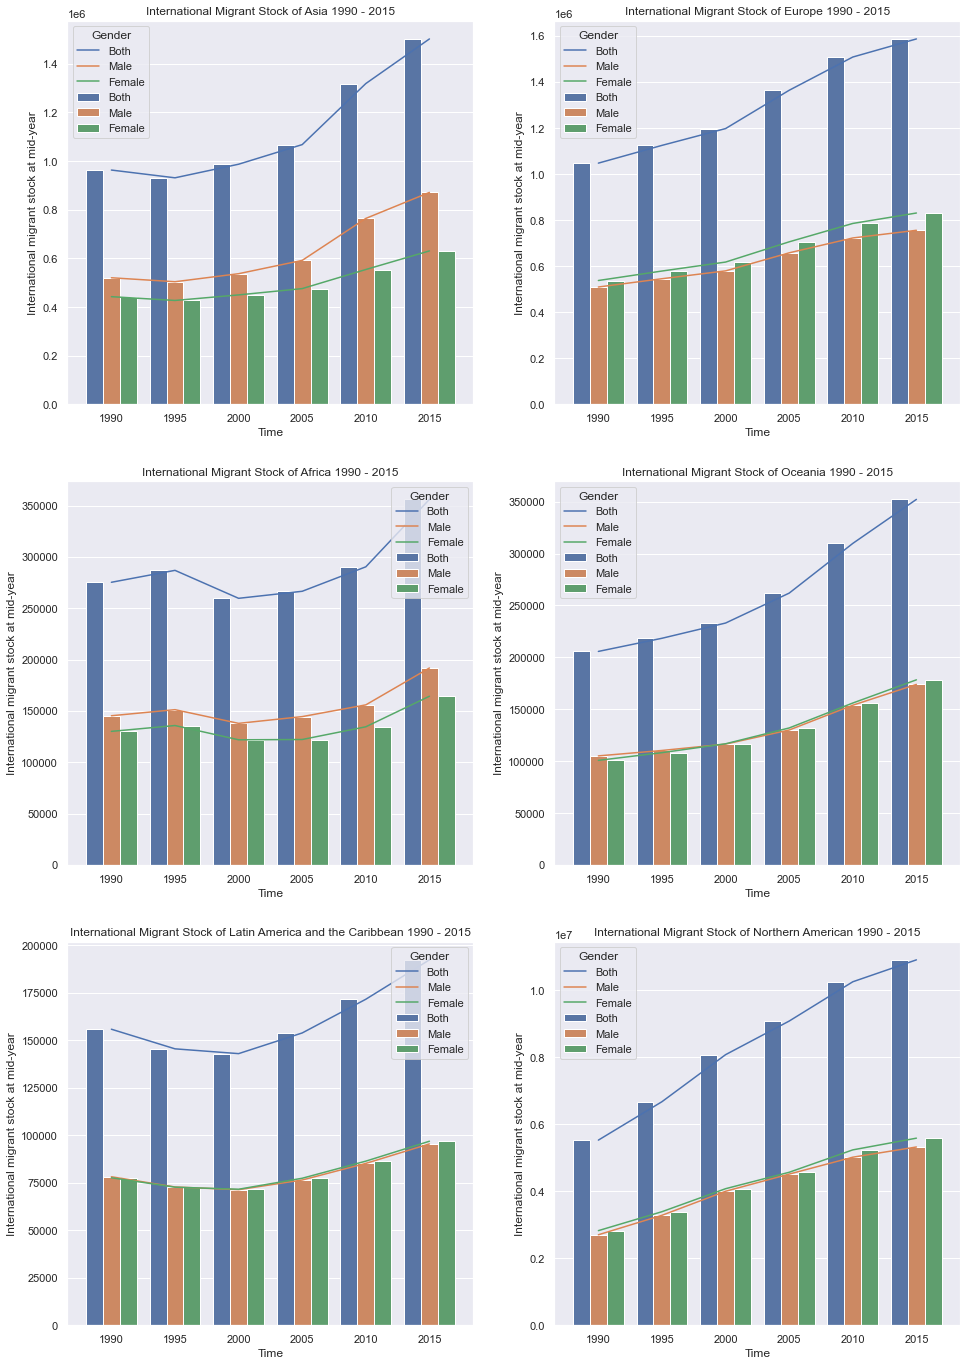

In [467]:
#use subplot to organize the position of graphs
#create line graph and bar chart in one graph for each major area
plt.figure(figsize=(16, 24))
plt.subplot(3, 2, 1)
sns.barplot(data=table1[table1["Major area"]=="Asia"],x="Time",y="International migrant stock at mid-year",hue="Gender",ci=None).set(title="International Migrant Stock of Asia 1990 - 2015")
sns.lineplot(data=table1[table1["Major area"]=="Asia"],x="Time",y="International migrant stock at mid-year",hue="Gender",ci=None)
plt.subplot(3, 2, 2)
sns.barplot(data=table1[table1["Major area"]=="Europe"],x="Time",y="International migrant stock at mid-year",hue="Gender",ci=None).set(title="International Migrant Stock of Europe 1990 - 2015")
sns.lineplot(data=table1[table1["Major area"]=="Europe"],x="Time",y="International migrant stock at mid-year",hue="Gender",ci=None)
plt.subplot(3, 2, 3)
sns.barplot(data=table1[table1["Major area"]=="Africa"],x="Time",y="International migrant stock at mid-year",hue="Gender",ci=None).set(title="International Migrant Stock of Africa 1990 - 2015")
sns.lineplot(data=table1[table1["Major area"]=="Africa"],x="Time",y="International migrant stock at mid-year",hue="Gender",ci=None)
plt.subplot(3, 2, 4)
sns.barplot(data=table1[table1["Major area"]=="Oceania"],x="Time",y="International migrant stock at mid-year",hue="Gender",ci=None).set(title="International Migrant Stock of Oceania 1990 - 2015")
sns.lineplot(data=table1[table1["Major area"]=="Oceania"],x="Time",y="International migrant stock at mid-year",hue="Gender",ci=None)
plt.subplot(3, 2, 5)
sns.barplot(data=table1[table1["Major area"]=="Latin America and the Caribbean"],x="Time",y="International migrant stock at mid-year",hue="Gender",ci=None).set(title="International Migrant Stock of Latin America and the Caribbean 1990 - 2015")
sns.lineplot(data=table1[table1["Major area"]=="Latin America and the Caribbean"],x="Time",y="International migrant stock at mid-year",hue="Gender",ci=None)
plt.subplot(3, 2, 6)
sns.barplot(data=table1[table1["Major area"]=="Northern America"],x="Time",y="International migrant stock at mid-year",hue="Gender",ci=None).set(title="International Migrant Stock of Northern American 1990 - 2015")
sns.lineplot(data=table1[table1["Major area"]=="Northern America"],x="Time",y="International migrant stock at mid-year",hue="Gender",ci=None)
plt.show()

C:\Users\zhy\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


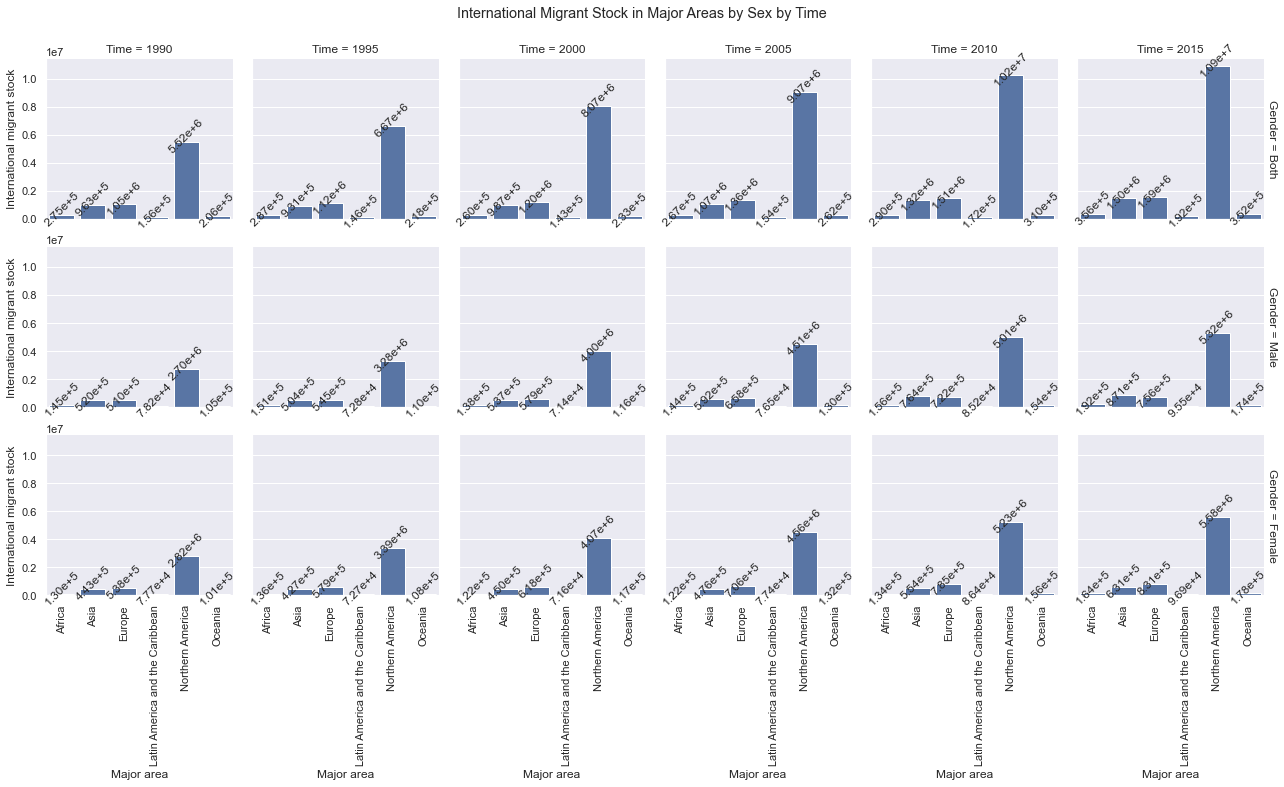

In [468]:
#use facegrid and map to create small multiples (bar chart)
g = sns.FacetGrid(table1, row="Gender", col="Time", margin_titles=True)

g.map(sns.barplot, "Major area", "International migrant stock at mid-year",ci=None)
#styling the labels and title
g.set_axis_labels("Major area", "International migrant stock")
g.set_xticklabels(rotation=90)
g.fig.subplots_adjust(top=.9)
g.fig.suptitle('International Migrant Stock in Major Areas by Sex by Time')
#add labels for each bar
for ax in g.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(decimal.Decimal(p.get_height()), '.2e'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 6),
                   textcoords = 'offset points',rotation=45)

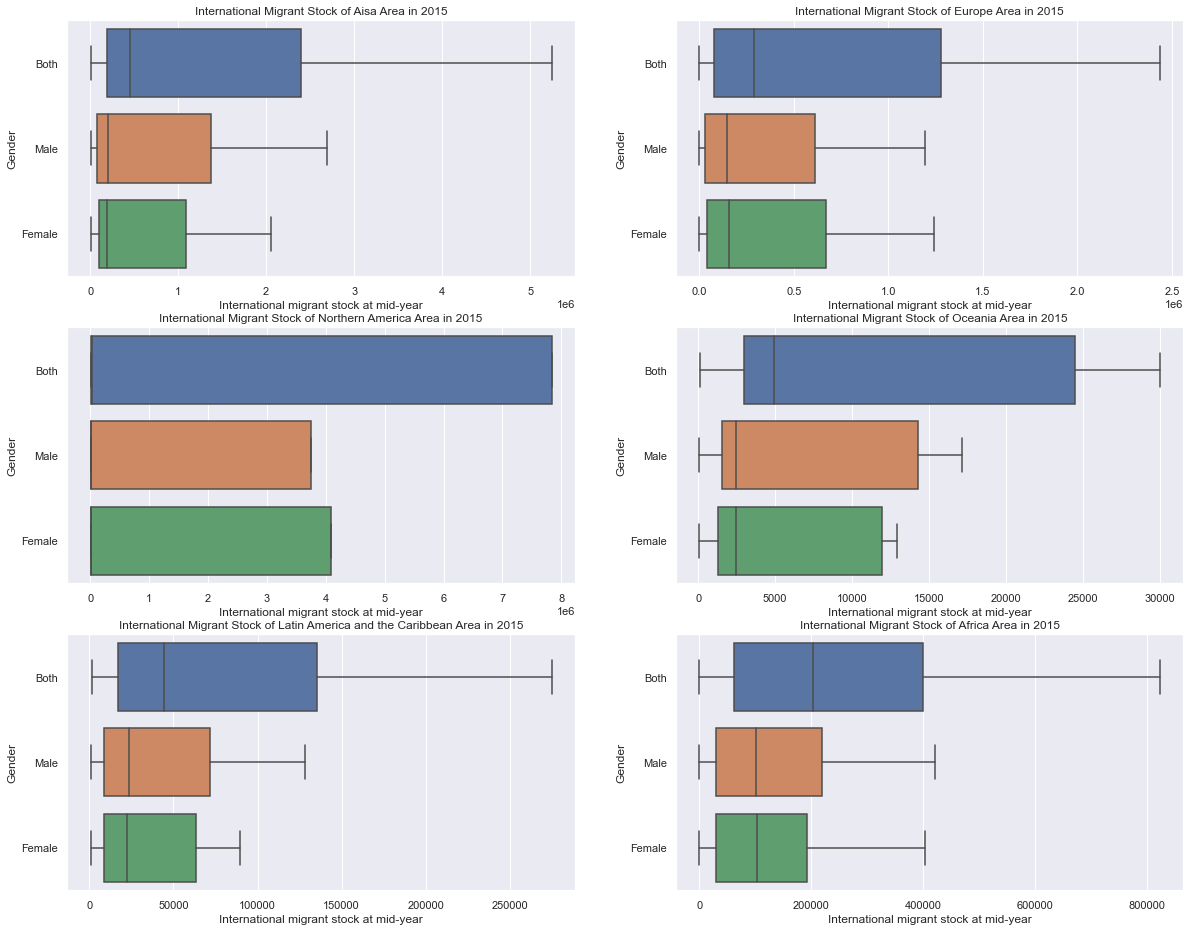

In [469]:
#use subplot to organize the position of graphs
#create box graph for each major area
plt.figure(figsize=(20, 16))
plt.subplot(3, 2, 1)
sns.boxplot(x="International migrant stock at mid-year", y="Gender", data=table1[(table1["Major area"]=="Asia")&(table1["Time"]=="2015")],showfliers = False).set(title="International Migrant Stock of Aisa Area in 2015")
plt.subplot(3, 2, 2)
sns.boxplot(x="International migrant stock at mid-year", y="Gender", data=table1[(table1["Major area"]=="Europe")&(table1["Time"]=="2015")],showfliers = False).set(title="International Migrant Stock of Europe Area in 2015")
plt.subplot(3, 2, 3)
sns.boxplot(x="International migrant stock at mid-year", y="Gender", data=table1[(table1["Major area"]=="Northern America")&(table1["Time"]=="2015")],showfliers = False).set(title="International Migrant Stock of Northern America Area in 2015")
plt.subplot(3, 2, 4)
sns.boxplot(x="International migrant stock at mid-year", y="Gender", data=table1[(table1["Major area"]=="Oceania")&(table1["Time"]=="2015")],showfliers = False).set(title="International Migrant Stock of Oceania Area in 2015")
plt.subplot(3, 2, 5)
sns.boxplot(x="International migrant stock at mid-year", y="Gender", data=table1[(table1["Major area"]=="Latin America and the Caribbean")&(table1["Time"]=="2015")],showfliers = False).set(title="International Migrant Stock of Latin America and the Caribbean Area in 2015")
plt.subplot(3, 2, 6)
sns.boxplot(x="International migrant stock at mid-year", y="Gender", data=table1[(table1["Major area"]=="Africa")&(table1["Time"]=="2015")],showfliers = False).set(title="International Migrant Stock of Africa Area in 2015")
plt.show()

In [470]:
#Table 2
#reset column names, drop "Notes" columns and add two empty columns
table2.columns = ["Sort Order", "Country or area", "Notes","Country code", "b1990", "b1995", "b2000", "b2005", "b2010", "b2015", "m1990", "m1995", "m2000", "m2005", "m2010", "m2015","f1990", "f1995", "f2000", "f2005", "f2010", "f2015"]
table2 = table2.drop(columns=["Notes"])
table2.insert(2, "Major area", "")
table2.insert(3, "Region", "")

#according to the annex table and the name of country or area, fill the proper variables for "Major area" and "Region" columns
index_table1 = 1
for x in table2["Country or area"]:
    index_annex = 0
    for y in annex["Country or area"]:
        if x == y:
            table2["Major area"][index_table1] = annex["Major area"][index_annex]
            table2["Region"][index_table1] = annex["Region"][index_annex]  
        index_annex+=1
    index_table1+=1

#change the format of dataframe
table2 = table2.replace("\..", np.nan, regex = True)
table2 = table2.melt(id_vars=["Sort Order", "Country or area", "Major area", "Region", "Country code"], var_name=["gy"], value_name="Total population at mid-year (thousands)")
table2 = (table2.assign(Gender = lambda x: x.gy.str[0].astype(str), Time = lambda x: x.gy.str[1:].astype(str)).drop("gy",axis=1))
table2 = table2.replace(to_replace =["b","m","f"],value =["Both", "Male", "Female"])
#table2 = table2.drop(table2[table2.Gender == "Both"].index)    

#styling the dataset
table2 = table2.drop(table2[table2.Region == ""].index)
table2 = table2[["Sort Order", "Country or area", "Major area", "Region", "Country code", "Gender", "Time", "Total population at mid-year (thousands)"]]
table2 = table2.reset_index()
table2 = table2.drop(columns="index")
table2.tail(20)

,Sort Order,Country or area,Major area,Region,Country code,Gender,Time,Total population at mid-year (thousands)
4156,244.0,New Caledonia,Oceania,Melanesia,540.0,Female,2015,130.393
4157,245.0,Papua New Guinea,Oceania,Melanesia,598.0,Female,2015,3732.533
4158,246.0,Solomon Islands,Oceania,Melanesia,90.0,Female,2015,287.268
4159,247.0,Vanuatu,Oceania,Melanesia,548.0,Female,2015,130.597
4160,249.0,Guam,Oceania,Micronesia,316.0,Female,2015,83.732
4161,250.0,Kiribati,Oceania,Micronesia,296.0,Female,2015,56.999
4162,251.0,Marshall Islands,Oceania,Micronesia,584.0,Female,2015,NaN
4163,252.0,Micronesia (Federated States of),Oceania,Micronesia,583.0,Female,2015,50.950
4164,253.0,Nauru,Oceania,Micronesia,520.0,Female,2015,NaN
4165,254.0,Northern Mariana Islands,Oceania,Micronesia,580.0,Female,2015,NaN


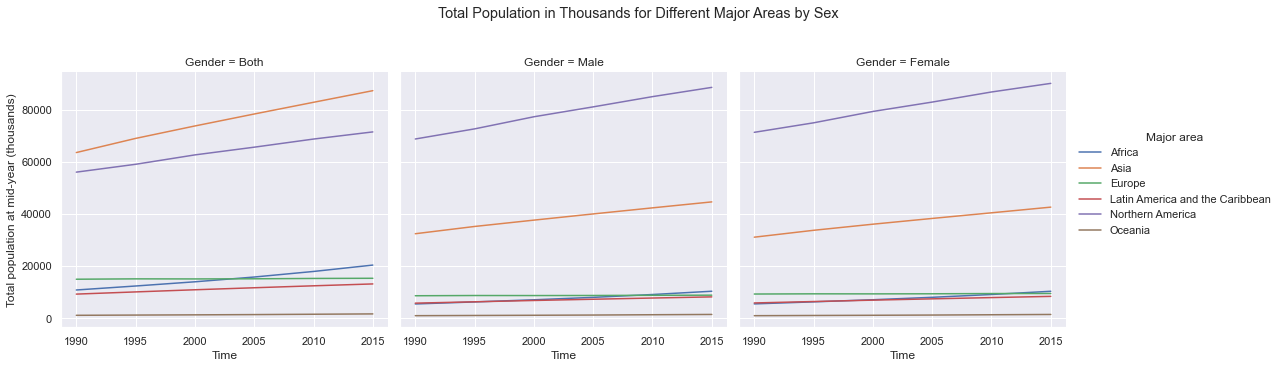

In [471]:
#use relplot to create small multiples (lines) for each gender
ax=sns.relplot(
    data=table2, x="Time", y="Total population at mid-year (thousands)",
    col="Gender", hue="Major area",kind="line",ci=None
)
#styling the title
ax.fig.subplots_adjust(top=.8)
ax.fig.suptitle('Total Population in Thousands for Different Major Areas by Sex')
plt.show()

In [472]:
#Table 3
#reset column names, drop "Notes" columns and add two empty columns
table3.columns = ["Sort Order", "Country or area", "Notes","Country code", "Type of data", "b1990", "b1995", "b2000", "b2005", "b2010", "b2015", "m1990", "m1995", "m2000", "m2005", "m2010", "m2015","f1990", "f1995", "f2000", "f2005", "f2010", "f2015"]
table3 = table3.drop(columns=["Notes"])
table3.insert(2, "Major area", "")
table3.insert(3, "Region", "")

#according to the annex table and the name of country or area, fill the proper variables for "Major area" and "Region" columns
index_table1 = 1
for x in table3["Country or area"]:
    index_annex = 0
    for y in annex["Country or area"]:
        if x == y:
            table3["Major area"][index_table1] = annex["Major area"][index_annex]
            table3["Region"][index_table1] = annex["Region"][index_annex]  
        index_annex+=1
    index_table1+=1

#change the format of dataframe
table3 = table3.replace("\..", np.nan, regex = True)    
table3 = table3.melt(id_vars=["Sort Order", "Country or area", "Major area", "Region", "Country code", "Type of data"], var_name=["gy"], value_name="International migrant stock as a percentage of the total population")
table3 = (table3.assign(Gender = lambda x: x.gy.str[0].astype(str), Time = lambda x: x.gy.str[1:].astype(str)).drop("gy",axis=1))
table3 = table3.replace(to_replace =["b","m","f"],value =["Both", "Male", "Female"])
#table3 = table3.drop(table3[table3.Gender == "Both"].index)    

#styling the dataset
table3 = table3.drop(table3[table3.Region == ""].index)
table3 = table3[["Sort Order", "Country or area", "Major area", "Region", "Country code", "Type of data", "Gender", "Time", "International migrant stock as a percentage of the total population"]]
table3 = table3.reset_index()
table3 = table3.drop(columns="index")
table3.head(-20)

,Sort Order,Country or area,Major area,Region,Country code,Type of data,Gender,Time,International migrant stock as a percentage of the total population
0,9.0,Burundi,Africa,Eastern Africa,108.0,B R,Both,1990,5.934467
1,10.0,Comoros,Africa,Eastern Africa,174.0,B,Both,1990,3.391353
2,11.0,Djibouti,Africa,Eastern Africa,262.0,B R,Both,1990,20.773307
3,12.0,Eritrea,Africa,Eastern Africa,232.0,I,Both,1990,0.377435
4,13.0,Ethiopia,Africa,Eastern Africa,231.0,B R,Both,1990,2.404203
...,...,...,...,...,...,...,...,...,...
4151,236.0,Saint Pierre and Miquelon,Northern America,Northern America,666.0,B,Female,2015,NaN
4152,237.0,United States of America,Northern America,Northern America,840.0,B,Female,2015,14.667744
4153,240.0,Australia,Oceania,Australia and New Zealand,36.0,B,Female,2015,28.567265
4154,241.0,New Zealand,Oceania,Australia and New Zealand,554.0,B,Female,2015,23.190304


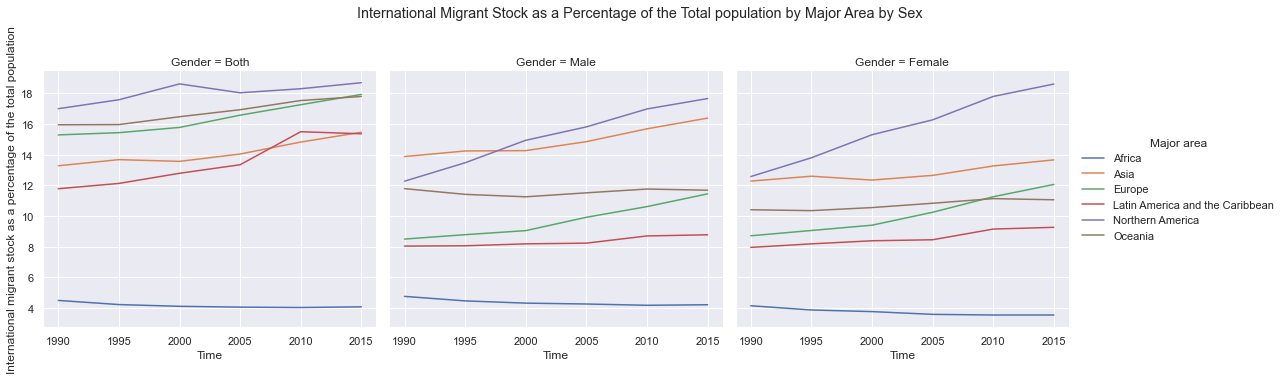

In [473]:
#use relplot to create small multiples (lines) for each gender
ax = sns.relplot(
    data=table3, x="Time", y="International migrant stock as a percentage of the total population",
    col="Gender", hue="Major area",kind="line",ci=None
)
#styling the title
ax.fig.subplots_adjust(top=.8)
ax.fig.suptitle('International Migrant Stock as a Percentage of the Total population by Major Area by Sex ')
plt.show()

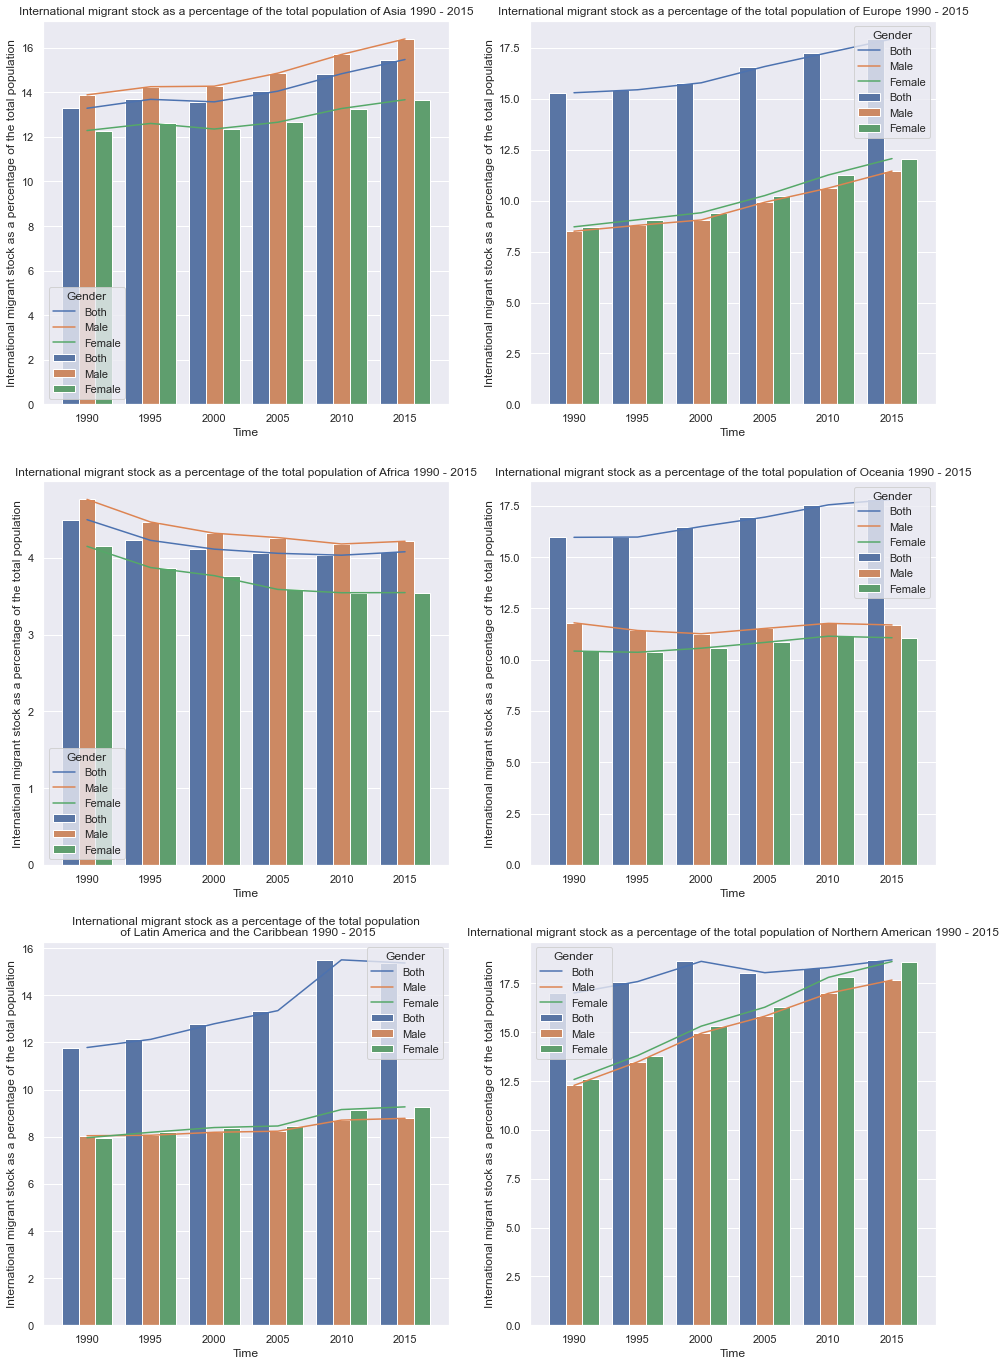

In [474]:
#use subplot to organize the position of graphs
#create line graph and bar chart in one graph for each major area
plt.figure(figsize=(16, 24))
plt.subplot(3, 2, 1)
sns.barplot(data=table3[table3["Major area"]=="Asia"],x="Time",y="International migrant stock as a percentage of the total population",hue="Gender",ci=None).set(title="International migrant stock as a percentage of the total population of Asia 1990 - 2015")
sns.lineplot(data=table3[table3["Major area"]=="Asia"],x="Time",y="International migrant stock as a percentage of the total population",hue="Gender",ci=None)
plt.subplot(3, 2, 2)
sns.barplot(data=table3[table3["Major area"]=="Europe"],x="Time",y="International migrant stock as a percentage of the total population",hue="Gender",ci=None).set(title="International migrant stock as a percentage of the total population of Europe 1990 - 2015")
sns.lineplot(data=table3[table3["Major area"]=="Europe"],x="Time",y="International migrant stock as a percentage of the total population",hue="Gender",ci=None)
plt.subplot(3, 2, 3)
sns.barplot(data=table3[table3["Major area"]=="Africa"],x="Time",y="International migrant stock as a percentage of the total population",hue="Gender",ci=None).set(title="International migrant stock as a percentage of the total population of Africa 1990 - 2015")
sns.lineplot(data=table3[table3["Major area"]=="Africa"],x="Time",y="International migrant stock as a percentage of the total population",hue="Gender",ci=None)
plt.subplot(3, 2, 4)
sns.barplot(data=table3[table3["Major area"]=="Oceania"],x="Time",y="International migrant stock as a percentage of the total population",hue="Gender",ci=None).set(title="International migrant stock as a percentage of the total population of Oceania 1990 - 2015")
sns.lineplot(data=table3[table3["Major area"]=="Oceania"],x="Time",y="International migrant stock as a percentage of the total population",hue="Gender",ci=None)
plt.subplot(3, 2, 5)
sns.barplot(data=table3[table3["Major area"]=="Latin America and the Caribbean"],x="Time",y="International migrant stock as a percentage of the total population",hue="Gender",ci=None).set(title="International migrant stock as a percentage of the total population\n of Latin America and the Caribbean 1990 - 2015")
sns.lineplot(data=table3[table3["Major area"]=="Latin America and the Caribbean"],x="Time",y="International migrant stock as a percentage of the total population",hue="Gender",ci=None)
plt.subplot(3, 2, 6)
sns.barplot(data=table3[table3["Major area"]=="Northern America"],x="Time",y="International migrant stock as a percentage of the total population",hue="Gender",ci=None).set(title="International migrant stock as a percentage of the total population of Northern American 1990 - 2015")
sns.lineplot(data=table3[table3["Major area"]=="Northern America"],x="Time",y="International migrant stock as a percentage of the total population",hue="Gender",ci=None)
plt.show()

In [475]:
#Table 4
#reset column names, drop "Notes" columns and add two empty columns
table4.columns = ["Sort Order", "Country or area", "Notes","Country code", "Type of data", "f1990", "f1995", "f2000", "f2005", "f2010", "f2015"]
table4 = table4.drop(columns=["Notes"])
table4.insert(2, "Major area", "")
table4.insert(3, "Region", "")

#according to the annex table and the name of country or area, fill the proper variables for "Major area" and "Region" columns
index_table1 = 1
for x in table4["Country or area"]:
    index_annex = 0
    for y in annex["Country or area"]:
        if x == y:
            table4["Major area"][index_table1] = annex["Major area"][index_annex]
            table4["Region"][index_table1] = annex["Region"][index_annex]  
        index_annex+=1
    index_table1+=1

#calculate female data and create columns for it
table4 = table4.replace("\..", np.nan, regex = True)
table4["m1990"] = 100 - table4["f1990"]
table4["m1995"] = 100 - table4["f1995"]
table4["m2000"] = 100 - table4["f2000"]
table4["m2005"] = 100 - table4["f2005"]
table4["m2010"] = 100 - table4["f2010"]
table4["m2015"] = 100 - table4["f2015"]
table4 = table4[["Sort Order", "Country or area", "Major area", "Region", "Country code", "Type of data", "m1990", "m1995", "m2000", "m2005", "m2010", "m2015", "f1990", "f1995", "f2000", "f2005", "f2010", "f2015"]]

#change the format of dataframe
table4 = table4.melt(id_vars=["Sort Order", "Country or area", "Major area", "Region", "Country code", "Type of data"], var_name=["gy"], value_name="Migrants as percentage of the international migrant stock")
table4 = (table4.assign(Gender = lambda x: x.gy.str[0].astype(str), Time = lambda x: x.gy.str[1:].astype(str)).drop("gy",axis=1))
table4 = table4.replace(to_replace =["m","f"],value =["Male", "Female"])

#styling the dataset
table4 = table4.drop(table4[table4.Region == ""].index)
table4 = table4[["Sort Order", "Country or area", "Major area", "Region", "Country code", "Type of data", "Gender", "Time", "Migrants as percentage of the international migrant stock"]]
table4 = table4.reset_index()
table4 = table4.drop(columns="index")
d = {'Year': [1990,1995,2000,2005,2010,2015], 'Percent': [49.0,49.2,49.1,48.8,48.3,48.2]}
df = pd.DataFrame(data=d)

table4.head(-20)


,Sort Order,Country or area,Major area,Region,Country code,Type of data,Gender,Time,Migrants as percentage of the international migrant stock
0,9.0,Burundi,Africa,Eastern Africa,108.0,B R,Male,1990,49.012939
1,10.0,Comoros,Africa,Eastern Africa,174.0,B,Male,1990,47.709354
2,11.0,Djibouti,Africa,Eastern Africa,262.0,B R,Male,1990,52.562162
3,12.0,Eritrea,Africa,Eastern Africa,232.0,I,Male,1990,52.565834
4,13.0,Ethiopia,Africa,Eastern Africa,231.0,B R,Male,1990,52.560953
...,...,...,...,...,...,...,...,...,...
2759,236.0,Saint Pierre and Miquelon,Northern America,Northern America,666.0,B,Female,2015,47.667343
2760,237.0,United States of America,Northern America,Northern America,840.0,B,Female,2015,51.049270
2761,240.0,Australia,Oceania,Australia and New Zealand,36.0,B,Female,2015,50.654253
2762,241.0,New Zealand,Oceania,Australia and New Zealand,554.0,B,Female,2015,51.642821


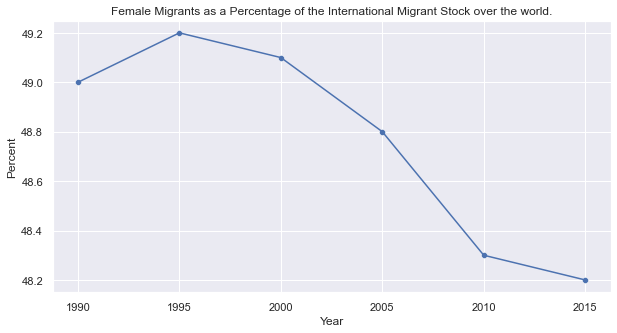

In [476]:
# use lineplot to create line graph and scatterplot to draw the point
plt.figure(figsize=(10, 5))
sns.lineplot(data=df,x="Year",y="Percent").set(title="Female Migrants as a Percentage of the International Migrant Stock over the world.")
sns.scatterplot(data=df,x="Year",y="Percent")
plt.show()


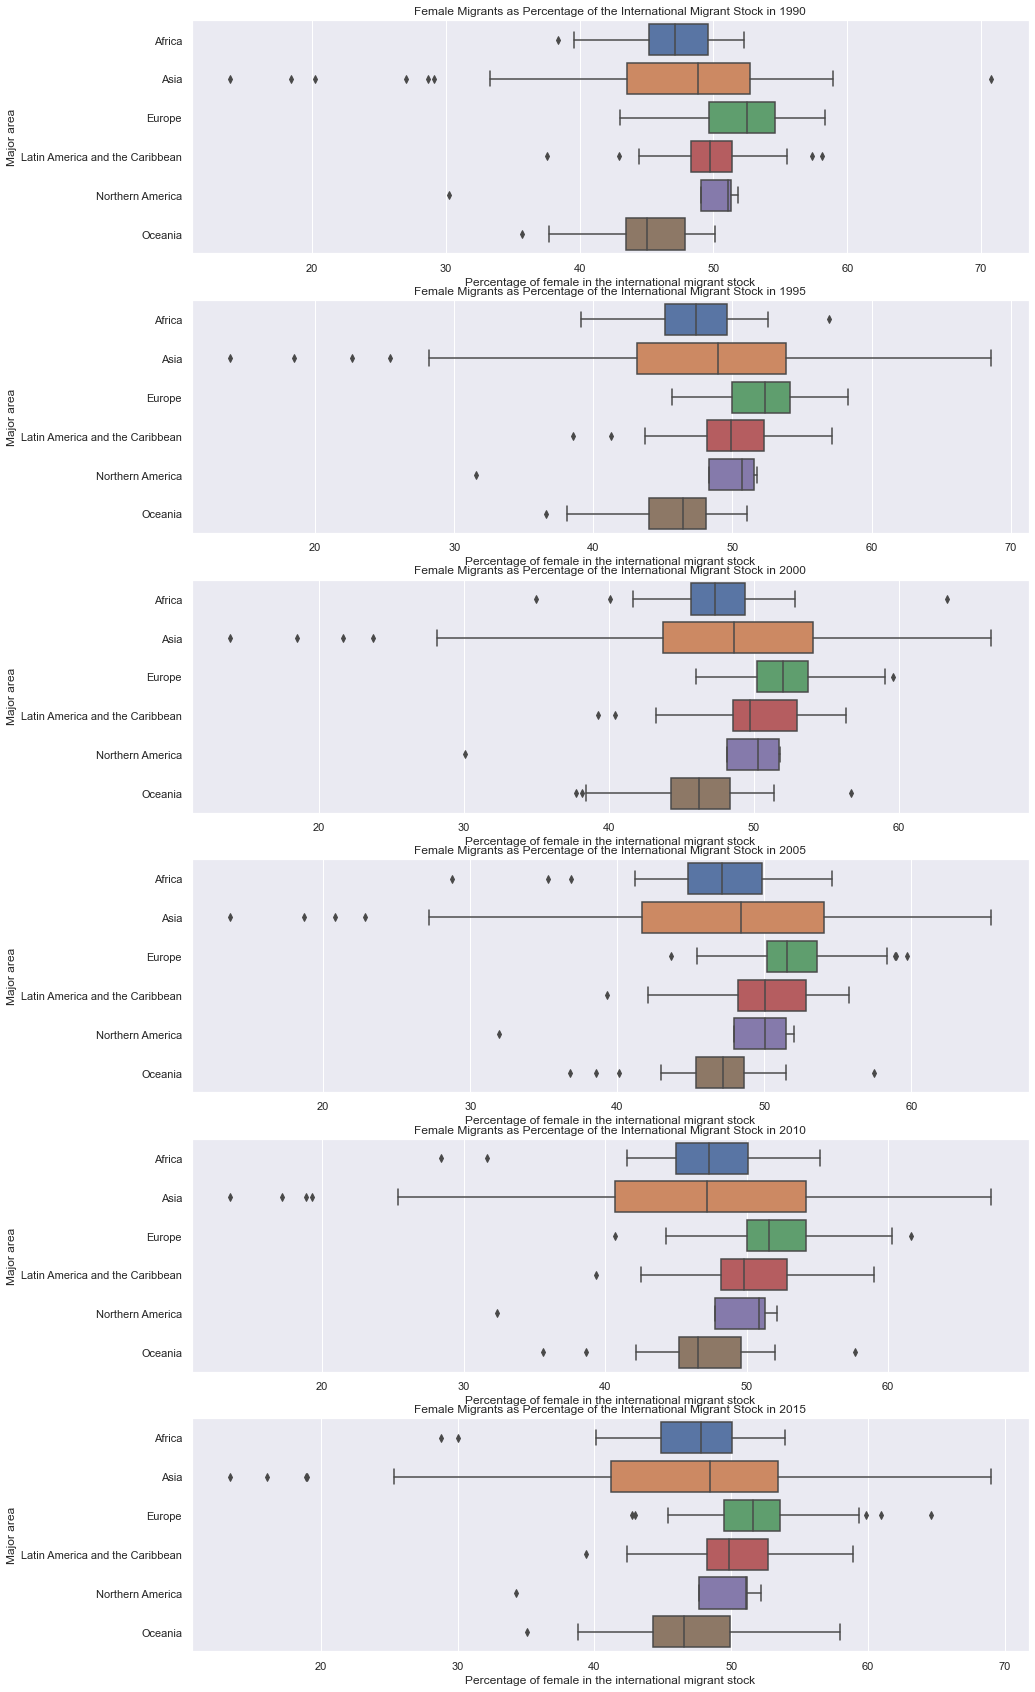

In [477]:
#use subplot to organize the position of graphs
#use boxplot to create box graph for each year
plt.figure(figsize=(15,30))
fig.tight_layout()
plt.subplot(6, 1, 1)
sns.boxplot(x="Migrants as percentage of the international migrant stock", y="Major area", data=table4[(table4["Gender"]=="Female")&(table4["Time"]=="1990")]).set(title="Female Migrants as Percentage of the International Migrant Stock in 1990",xlabel='Percentage of female in the international migrant stock')
plt.subplot(6, 1, 2)
sns.boxplot(x="Migrants as percentage of the international migrant stock", y="Major area", data=table4[(table4["Gender"]=="Female")&(table4["Time"]=="1995")]).set(title="Female Migrants as Percentage of the International Migrant Stock in 1995",xlabel='Percentage of female in the international migrant stock')
plt.subplot(6, 1, 3)
sns.boxplot(x="Migrants as percentage of the international migrant stock", y="Major area", data=table4[(table4["Gender"]=="Female")&(table4["Time"]=="2000")]).set(title="Female Migrants as Percentage of the International Migrant Stock in 2000",xlabel='Percentage of female in the international migrant stock')
plt.subplot(6, 1, 4)
sns.boxplot(x="Migrants as percentage of the international migrant stock", y="Major area", data=table4[(table4["Gender"]=="Female")&(table4["Time"]=="2005")]).set(title="Female Migrants as Percentage of the International Migrant Stock in 2005",xlabel='Percentage of female in the international migrant stock')
plt.subplot(6, 1, 5)
sns.boxplot(x="Migrants as percentage of the international migrant stock", y="Major area", data=table4[(table4["Gender"]=="Female")&(table4["Time"]=="2010")]).set(title="Female Migrants as Percentage of the International Migrant Stock in 2010",xlabel='Percentage of female in the international migrant stock')
plt.subplot(6, 1, 6)
sns.boxplot(x="Migrants as percentage of the international migrant stock", y="Major area", data=table4[(table4["Gender"]=="Female")&(table4["Time"]=="2015")]).set(title="Female Migrants as Percentage of the International Migrant Stock in 2015",xlabel='Percentage of female in the international migrant stock')
plt.show()


In [478]:
#combine table 1-4 into one dataset
table_general = table1 
table_general["Total population at mid-year (thousands)"] = table2["Total population at mid-year (thousands)"]
table_general["International migrant stock as a percentage of the total population"] = table3["International migrant stock as a percentage of the total population"]
table_general["Migrants as percentage of the international migrant stock"] = table4["Migrants as percentage of the international migrant stock"]
table_general.head(-20)

,Sort Order,Country or area,Major area,Region,Country code,Type of data,Gender,Time,International migrant stock at mid-year,Total population at mid-year (thousands),International migrant stock as a percentage of the total population,Migrants as percentage of the international migrant stock
0,9.0,Burundi,Africa,Eastern Africa,108.0,B R,Both,1990,333110.0,5613.141,5.934467,49.012939
1,10.0,Comoros,Africa,Eastern Africa,174.0,B,Both,1990,14079.0,415.144,3.391353,47.709354
2,11.0,Djibouti,Africa,Eastern Africa,262.0,B R,Both,1990,122221.0,588.356,20.773307,52.562162
3,12.0,Eritrea,Africa,Eastern Africa,232.0,I,Both,1990,11848.0,3139.083,0.377435,52.565834
4,13.0,Ethiopia,Africa,Eastern Africa,231.0,B R,Both,1990,1155390.0,48057.094,2.404203,52.560953
...,...,...,...,...,...,...,...,...,...,...,...,...
4151,236.0,Saint Pierre and Miquelon,Northern America,Northern America,666.0,B,Female,2015,470.0,NaN,NaN,NaN
4152,237.0,United States of America,Northern America,Northern America,840.0,B,Female,2015,23802795.0,162279.859,14.667744,NaN
4153,240.0,Australia,Oceania,Australia and New Zealand,36.0,B,Female,2015,3426083.0,11993.038,28.567265,NaN
4154,241.0,New Zealand,Oceania,Australia and New Zealand,554.0,B,Female,2015,536949.0,2315.403,23.190304,NaN


In [479]:
#Table 5
#reset column names, drop "Notes" columns and add two empty columns
table5.columns = ["Sort Order", "Country or area", "Notes","Country code", "Type of data", "b1990-1995", "b1995-2000", "b2000-2005", "b2005-2010", "b2010-2015", "m1990-1995", "m1995-2000", "m2000-2005", "m2005-2010", "m2010-2015", "f1990-1995", "f1995-2000", "f2000-2005", "f2005-2010", "f2010-2015"]
table5 = table5.drop(columns=["Notes"])
table5.insert(2, "Major area", "")
table5.insert(3, "Region", "")

#according to the annex table and the name of country or area, fill the proper variables for "Major area" and "Region" columns
index_table1 = 1
for x in table5["Country or area"]:
    index_annex = 0
    for y in annex["Country or area"]:
        if x == y:
            table5["Major area"][index_table1] = annex["Major area"][index_annex]
            table5["Region"][index_table1] = annex["Region"][index_annex]  
        index_annex+=1
    index_table1+=1

#change the format of dataframe
table5 = table5.replace("\..", np.nan, regex = True)
table5 = table5.melt(id_vars=["Sort Order", "Country or area", "Major area", "Region", "Country code", "Type of data"], var_name=["gy"], value_name="Annual rate of change of the migrant stock")
table5 = (table5.assign(Gender = lambda x: x.gy.str[0].astype(str), Time = lambda x: x.gy.str[1:].astype(str)).drop("gy",axis=1))
table5 = table5.replace(to_replace =["b","m","f"],value =["Both", "Male", "Female"])
#table5 = table5.drop(table5[table5.Gender == "Both"].index)    

#styling the dataset
table5 = table5.drop(table5[table5.Region == ""].index)
table5 = table5[["Sort Order", "Country or area", "Major area", "Region", "Country code", "Type of data", "Gender", "Time", "Annual rate of change of the migrant stock"]]
table5 = table5.reset_index()
table5 = table5.drop(columns="index")
table5.head(20)


,Sort Order,Country or area,Major area,Region,Country code,Type of data,Gender,Time,Annual rate of change of the migrant stock
0,9.0,Burundi,Africa,Eastern Africa,108.0,B R,Both,1990-1995,-5.355717
1,10.0,Comoros,Africa,Eastern Africa,174.0,B,Both,1990-1995,-0.199873
2,11.0,Djibouti,Africa,Eastern Africa,262.0,B R,Both,1990-1995,-4.058465
3,12.0,Eritrea,Africa,Eastern Africa,232.0,I,Both,1990-1995,0.910748
4,13.0,Ethiopia,Africa,Eastern Africa,231.0,B R,Both,1990-1995,-7.179771
5,14.0,Kenya,Africa,Eastern Africa,404.0,B R,Both,1990-1995,14.659568
6,15.0,Madagascar,Africa,Eastern Africa,450.0,C,Both,1990-1995,-2.433476
7,16.0,Malawi,Africa,Eastern Africa,454.0,B R,Both,1990-1995,-30.811478
8,17.0,Mauritius,Africa,Eastern Africa,480.0,C,Both,1990-1995,14.588616
9,18.0,Mayotte,Africa,Eastern Africa,175.0,B,Both,1990-1995,10.939512


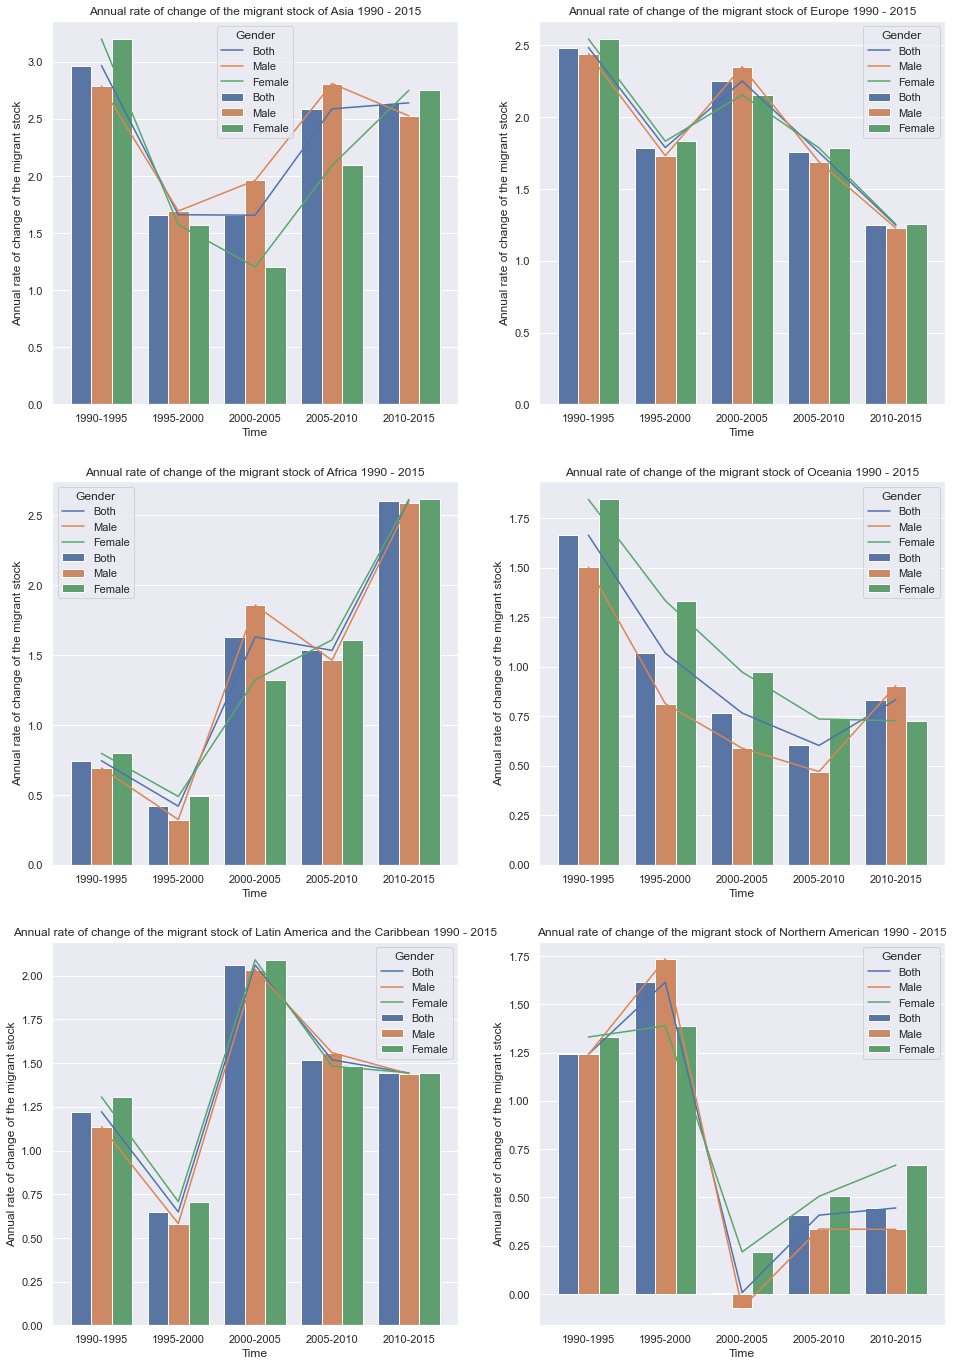

In [480]:
#use subplot to organize the position of graphs
#create line graph and bar chart in one graph for each major area
plt.figure(figsize=(16, 24))
plt.subplot(3, 2, 1)
sns.barplot(data=table5[table5["Major area"]=="Asia"],x="Time",y="Annual rate of change of the migrant stock",hue="Gender",ci=None).set(title="Annual rate of change of the migrant stock of Asia 1990 - 2015")
sns.lineplot(data=table5[table5["Major area"]=="Asia"],x="Time",y="Annual rate of change of the migrant stock",hue="Gender",ci=None)
plt.subplot(3, 2, 2)
sns.barplot(data=table5[table5["Major area"]=="Europe"],x="Time",y="Annual rate of change of the migrant stock",hue="Gender",ci=None).set(title="Annual rate of change of the migrant stock of Europe 1990 - 2015")
sns.lineplot(data=table5[table5["Major area"]=="Europe"],x="Time",y="Annual rate of change of the migrant stock",hue="Gender",ci=None)
plt.subplot(3, 2, 3)
sns.barplot(data=table5[table5["Major area"]=="Africa"],x="Time",y="Annual rate of change of the migrant stock",hue="Gender",ci=None).set(title="Annual rate of change of the migrant stock of Africa 1990 - 2015")
sns.lineplot(data=table5[table5["Major area"]=="Africa"],x="Time",y="Annual rate of change of the migrant stock",hue="Gender",ci=None)
plt.subplot(3, 2, 4)
sns.barplot(data=table5[table5["Major area"]=="Oceania"],x="Time",y="Annual rate of change of the migrant stock",hue="Gender",ci=None).set(title="Annual rate of change of the migrant stock of Oceania 1990 - 2015")
sns.lineplot(data=table5[table5["Major area"]=="Oceania"],x="Time",y="Annual rate of change of the migrant stock",hue="Gender",ci=None)
plt.subplot(3, 2, 5)
sns.barplot(data=table5[table5["Major area"]=="Latin America and the Caribbean"],x="Time",y="Annual rate of change of the migrant stock",hue="Gender",ci=None).set(title="Annual rate of change of the migrant stock of Latin America and the Caribbean 1990 - 2015")
sns.lineplot(data=table5[table5["Major area"]=="Latin America and the Caribbean"],x="Time",y="Annual rate of change of the migrant stock",hue="Gender",ci=None)
plt.subplot(3, 2, 6)
sns.barplot(data=table5[table5["Major area"]=="Northern America"],x="Time",y="Annual rate of change of the migrant stock",hue="Gender",ci=None).set(title="Annual rate of change of the migrant stock of Northern American 1990 - 2015")
sns.lineplot(data=table5[table5["Major area"]=="Northern America"],x="Time",y="Annual rate of change of the migrant stock",hue="Gender",ci=None)
plt.show()

In [481]:
#Table 6
#reset column names, drop "Notes" columns and add two empty columns
table6.columns = ["Sort Order", "Country or area", "Notes","Country code", "Type of data", "e1990", "e1995", "e2000", "e2005", "e2010", "e2015", "r1990", "r1995", "r2000", "r2005", "r2010", "r2015", "1990-1995", "1995-2000", "2000-2005", "2005-2010", "2010-2015"]
table6 = table6.drop(columns=["Notes"])
table6.insert(2, "Major area", "")
table6.insert(3, "Region", "")

#according to the annex table and the name of country or area, fill the proper variables for "Major area" and "Region" columns
index_table1 = 1
for x in table6["Country or area"]:
    index_annex = 0
    for y in annex["Country or area"]:
        if x == y:
            table6["Major area"][index_table1] = annex["Major area"][index_annex]
            table6["Region"][index_table1] = annex["Region"][index_annex]  
        index_annex+=1
    index_table1+=1

#divide table 6 into three different tables
table6_1 = table6.drop(columns=["r1990", "r1995", "r2000", "r2005", "r2010", "r2015", "1990-1995", "1995-2000", "2000-2005", "2005-2010", "2010-2015"])
table6_2 = table6.drop(columns=["e1990", "e1995", "e2000", "e2005", "e2010", "e2015", "1990-1995", "1995-2000", "2000-2005", "2005-2010", "2010-2015"])
table6_3 = table6.drop(columns=["e1990", "e1995", "e2000", "e2005", "e2010", "e2015", "r1990", "r1995", "r2000", "r2005", "r2010", "r2015"])

In [482]:
#change the format of dataframe
table6_1 = table6_1.replace("\..", np.nan, regex = True)
table6_1.columns = ["Sort Order", "Country or area", "Major area", "Region", "Country code", "Type of data", "1990", "1995", "2000", "2005", "2010", "2015"]
table6_1 = table6_1.melt(id_vars=["Sort Order", "Country or area", "Major area", "Region", "Country code", "Type of data"], var_name=["Year"], value_name="Estimated refugee stock at mid-year (both sexes)")
#styling the dataset
table6_1 = table6_1.drop(table6_1[table6_1.Region == ""].index)
table6_1 = table6_1.reset_index()
table6_1 = table6_1.drop(columns="index")

table6_1.head(-10)

,Sort Order,Country or area,Major area,Region,Country code,Type of data,Year,Estimated refugee stock at mid-year (both sexes)
0,9.0,Burundi,Africa,Eastern Africa,108.0,B R,1990,267929.0
1,10.0,Comoros,Africa,Eastern Africa,174.0,B,1990,0.0
2,11.0,Djibouti,Africa,Eastern Africa,262.0,B R,1990,54508.0
3,12.0,Eritrea,Africa,Eastern Africa,232.0,I,1990,0.0
4,13.0,Ethiopia,Africa,Eastern Africa,231.0,B R,1990,741965.0
...,...,...,...,...,...,...,...,...
1377,250.0,Kiribati,Oceania,Micronesia,296.0,B,2015,0.0
1378,251.0,Marshall Islands,Oceania,Micronesia,584.0,B,2015,0.0
1379,252.0,Micronesia (Federated States of),Oceania,Micronesia,583.0,B,2015,0.0
1380,253.0,Nauru,Oceania,Micronesia,520.0,C,2015,389.0


In [483]:
#change the format of dataframe
table6_2 = table6_2.replace("\..", np.nan, regex = True)
table6_2.columns = ["Sort Order", "Country or area", "Major area", "Region", "Country code", "Type of data", "1990", "1995", "2000", "2005", "2010", "2015"]
table6_2 = table6_2.melt(id_vars=["Sort Order", "Country or area", "Major area", "Region", "Country code", "Type of data"], var_name=["Year"], value_name="Refugees as a percentage of the international migrant stock")
#styling the dataset
table6_2 = table6_2.drop(table6_2[table6_2.Region == ""].index)
table6_2 = table6_2.reset_index()
table6_2 = table6_2.drop(columns="index")
table6_2.head(-10)

,Sort Order,Country or area,Major area,Region,Country code,Type of data,Year,Refugees as a percentage of the international migrant stock
0,9.0,Burundi,Africa,Eastern Africa,108.0,B R,1990,80.432590
1,10.0,Comoros,Africa,Eastern Africa,174.0,B,1990,0.000000
2,11.0,Djibouti,Africa,Eastern Africa,262.0,B R,1990,44.597901
3,12.0,Eritrea,Africa,Eastern Africa,232.0,I,1990,0.000000
4,13.0,Ethiopia,Africa,Eastern Africa,231.0,B R,1990,64.217710
...,...,...,...,...,...,...,...,...
1377,250.0,Kiribati,Oceania,Micronesia,296.0,B,2015,0.000000
1378,251.0,Marshall Islands,Oceania,Micronesia,584.0,B,2015,0.000000
1379,252.0,Micronesia (Federated States of),Oceania,Micronesia,583.0,B,2015,0.000000
1380,253.0,Nauru,Oceania,Micronesia,520.0,C,2015,12.240403


In [484]:
#combine the result of table6_1 and table6_2
table6_general = table6_1
table6_general["Refugees as a percentage of the international migrant stock"] = table6_2["Refugees as a percentage of the international migrant stock"]
table6_general.head(-10)

,Sort Order,Country or area,Major area,Region,Country code,Type of data,Year,Estimated refugee stock at mid-year (both sexes),Refugees as a percentage of the international migrant stock
0,9.0,Burundi,Africa,Eastern Africa,108.0,B R,1990,267929.0,80.432590
1,10.0,Comoros,Africa,Eastern Africa,174.0,B,1990,0.0,0.000000
2,11.0,Djibouti,Africa,Eastern Africa,262.0,B R,1990,54508.0,44.597901
3,12.0,Eritrea,Africa,Eastern Africa,232.0,I,1990,0.0,0.000000
4,13.0,Ethiopia,Africa,Eastern Africa,231.0,B R,1990,741965.0,64.217710
...,...,...,...,...,...,...,...,...,...
1377,250.0,Kiribati,Oceania,Micronesia,296.0,B,2015,0.0,0.000000
1378,251.0,Marshall Islands,Oceania,Micronesia,584.0,B,2015,0.0,0.000000
1379,252.0,Micronesia (Federated States of),Oceania,Micronesia,583.0,B,2015,0.0,0.000000
1380,253.0,Nauru,Oceania,Micronesia,520.0,C,2015,389.0,12.240403


In [485]:
#change the format of dataframe
table6_3 = table6_3.replace("\..", np.nan, regex = True)
table6_3 = table6_3.melt(id_vars=["Sort Order", "Country or area", "Major area", "Region", "Country code", "Type of data"], var_name=["Year"], value_name="Annual rate of change of the refugee stock")
#styling the dataset
table6_3 = table6_3.drop(table6_3[table6_3.Region == ""].index)
table6_3 = table6_3.reset_index()
table6_3 = table6_3.drop(columns="index")
table6_3.head(20)

,Sort Order,Country or area,Major area,Region,Country code,Type of data,Year,Annual rate of change of the refugee stock
0,9.0,Burundi,Africa,Eastern Africa,108.0,B R,1990-1995,-3.390926
1,10.0,Comoros,Africa,Eastern Africa,174.0,B,1990-1995,NaN
2,11.0,Djibouti,Africa,Eastern Africa,262.0,B R,1990-1995,-9.763426
3,12.0,Eritrea,Africa,Eastern Africa,232.0,I,1990-1995,NaN
4,13.0,Ethiopia,Africa,Eastern Africa,231.0,B R,1990-1995,-5.505717
5,14.0,Kenya,Africa,Eastern Africa,404.0,B R,1990-1995,42.521055
6,15.0,Madagascar,Africa,Eastern Africa,450.0,C,1990-1995,NaN
7,16.0,Malawi,Africa,Eastern Africa,454.0,B R,1990-1995,-104.307376
8,17.0,Mauritius,Africa,Eastern Africa,480.0,C,1990-1995,NaN
9,18.0,Mayotte,Africa,Eastern Africa,175.0,B,1990-1995,NaN


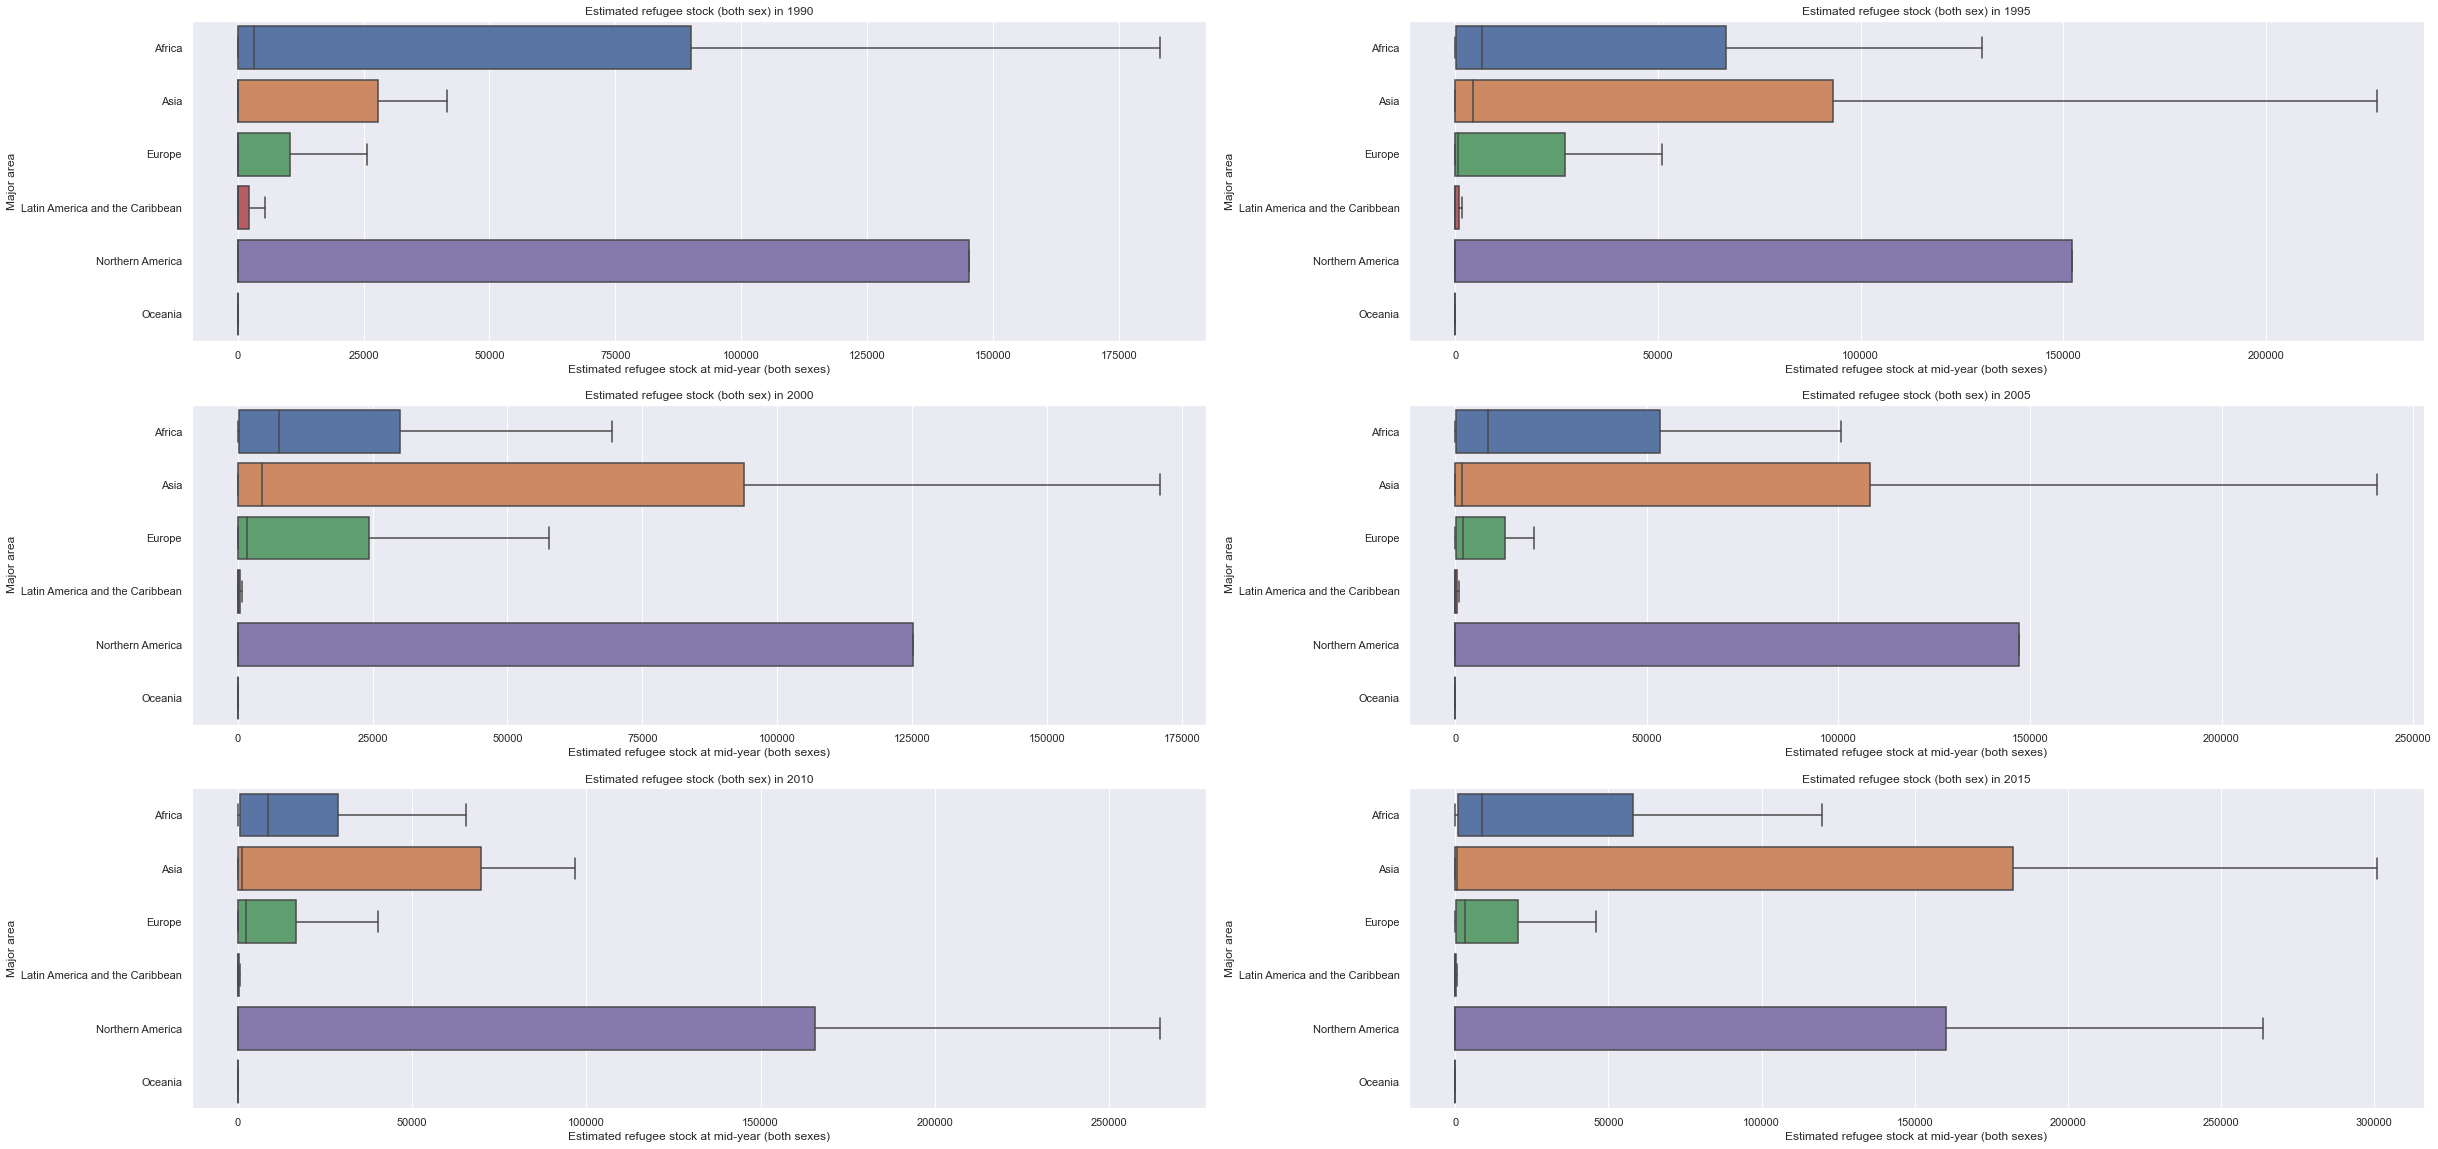

In [486]:
#use subplot to organize the position of graphs
#use boxplot to create box graph for each year
plt.figure(figsize=(40,20))
plt.subplot(3,2,1)
sns.boxplot(x="Estimated refugee stock at mid-year (both sexes)", y="Major area", data=table6_1[(table6_1["Year"]=="1990")],showfliers = False).set(title="Estimated refugee stock (both sex) in 1990")
plt.subplot(3,2,2)
sns.boxplot(x="Estimated refugee stock at mid-year (both sexes)", y="Major area", data=table6_1[(table6_1["Year"]=="1995")],showfliers = False).set(title="Estimated refugee stock (both sex) in 1995")
plt.subplot(3,2,3)
sns.boxplot(x="Estimated refugee stock at mid-year (both sexes)", y="Major area", data=table6_1[(table6_1["Year"]=="2000")],showfliers = False).set(title="Estimated refugee stock (both sex) in 2000")
plt.subplot(3,2,4)
sns.boxplot(x="Estimated refugee stock at mid-year (both sexes)", y="Major area", data=table6_1[(table6_1["Year"]=="2005")],showfliers = False).set(title="Estimated refugee stock (both sex) in 2005")
plt.subplot(3,2,5)
sns.boxplot(x="Estimated refugee stock at mid-year (both sexes)", y="Major area", data=table6_1[(table6_1["Year"]=="2010")],showfliers = False).set(title="Estimated refugee stock (both sex) in 2010")
plt.subplot(3,2,6)
sns.boxplot(x="Estimated refugee stock at mid-year (both sexes)", y="Major area", data=table6_1[(table6_1["Year"]=="2015")],showfliers = False).set(title="Estimated refugee stock (both sex) in 2015")
plt.show()

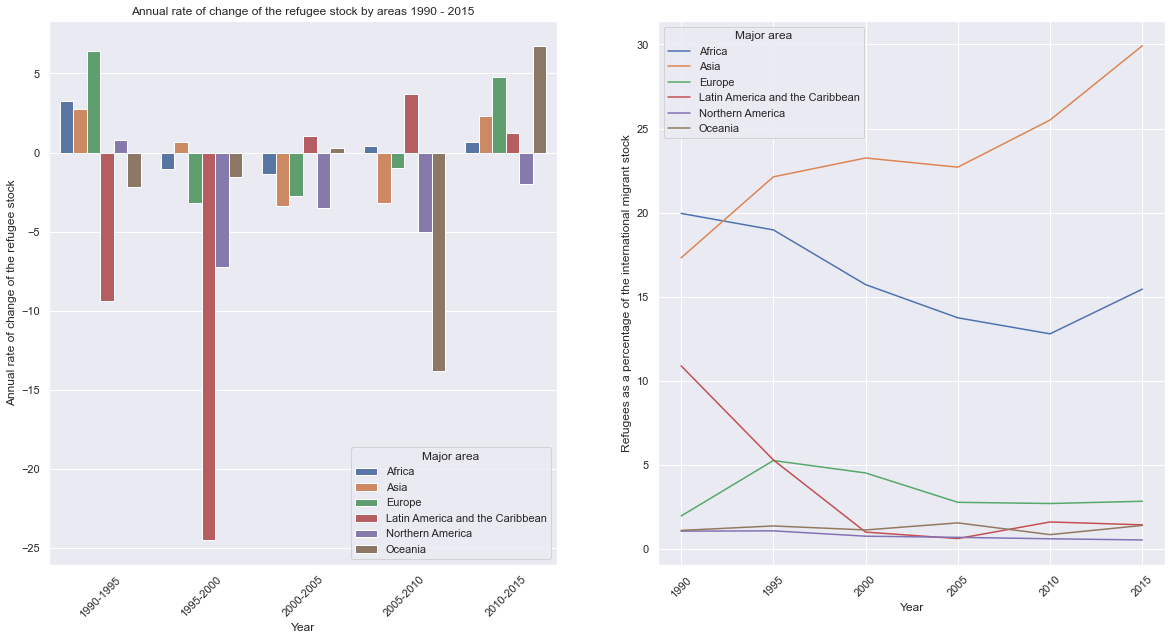

In [487]:
#use subplot to organize the position of graphs
#use barplot to create bar chart
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(data=table6_3,x="Year",y="Annual rate of change of the refugee stock",hue="Major area",ci=None).set(title="Annual rate of change of the refugee stock by areas 1990 - 2015")
#rotate the label
plt.xticks(rotation=45)
#use lineplot to create line graph
plt.subplot(1,2,2)
sns.lineplot(data=table6_2,x="Year", y="Refugees as a percentage of the international migrant stock",hue="Major area",ci=None)
#rotate the label
plt.xticks(rotation=45)
plt.show()